In [54]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import warnings
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from csv import reader as rdr
from sklearn.model_selection import GridSearchCV

Data Preprocessing Step:
In the data preprocessing:
  1. we read the data from the file abalone.data
  2. Replace all males by 0 and all females by 1 and others by 2
  3. Make a split using np.split which is a 8:1 split

In [55]:
def read_dataset_with_random_splitting(filename):
  data = []
  with open(filename,'r') as f:
    tmpData = rdr(f)
    for val in tmpData:
      data.append(val)
  
  for val in data:
    if(val[0] == 'M'):
      val[0] = 0
    elif(val[0] == 'F'):
      val[0] = 1
    else:
      val[0] = 2
  
  for val in data:
    i = 0
    while(i < len(val)):
      val[i] = float(val[i])
      i+=1
  
  dataset_array = np.array(data)
  df = pd.DataFrame(dataset_array)
  df = df.iloc[np.random.RandomState(seed=0).permutation(len(df))]

  return df.iloc[:,:8], df.iloc[:,8:]


In [56]:
def read_dataset(filename):
  data = []
  with open(filename,'r') as f:
    tmpData = rdr(f)
    for val in tmpData:
      data.append(val)
  
  for val in data:
    if(val[0] == 'M'):
      val[0] = 1
    elif(val[0] == 'F'):
      val[0] = 0
    else:
      val[0] = 2
  
  for val in data:
    i = 0
    while(i < len(val)):
      val[i] = float(val[i])
      i+=1
  
  dataset_array = np.array(data)
  train,test = np.split(dataset_array,[int(0.8*len(data))])
  return train[:,:-1], train[:,-1:],test[:,:-1],test[:,-1:]

The below is the code for implementation of Linear Regression
  1. lossFunction: Calculates the loss
  2. decreaseRate: Calculate the value of dw and db
  3. gradientDecent: perform gradient decent 
  4. linear: function calling all the above function and computing the matrix and bias values
  5. predict: Computes the values on unseen data

In [57]:
class MyLinearRegression:
  def __init__(self,x_train,y_train,learning_rate,iterations):
    self.x_train = x_train
    self.y_train = y_train
    self.sampleSize = self.x_train.shape[0]
    self.sampleFeatures = self.x_train.shape[1]
    self.weight_matrix = np.zeros(self.sampleFeatures)
    self.bias_val = 0
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.loss = 0
  
  def lossFunction(self):
    # Calculating loss
    equation_val = np.dot(self.x_train,self.weight_matrix) + self.bias_val
    self.loss = equation_val - self.y_train.T
    self.loss = np.reshape(self.loss,self.sampleSize)
  
  def decreaseRate(self):
    # calculating dw and db
    return ((1/self.sampleSize)*np.dot(self.x_train.T,self.loss)),((1/self.sampleSize)*sum(self.loss))
  
  def gradientDecent(self,dw,db):
    # calculating gradient decent
    self.weight_matrix = self.weight_matrix - (self.learning_rate*dw)
    self.bias_val = self.bias_val - (self.learning_rate*db)

  def linear(self):
    # linear regression
    i = 0
    while(i < self.iterations):
      self.lossFunction()
      dw,db = self.decreaseRate()
      self.gradientDecent(dw,db)
      i+=1
  
  def predict(self,x_test):
    return np.dot(x_test,self.weight_matrix) + self.bias_val

Function to compute RMSE of the values that are predicted

In [58]:
def compute_rmse(actual_y,predicted_y):
  return np.sqrt(np.sum(np.square(np.array(predicted_y)- np.array(actual_y))))/len(predicted_y)

Computing linear regression from the function made:
  1. Learning rate: 0.01
  2. iterations: 10000

In [59]:
x_train,y_train,x_test,y_test = read_dataset("C:\\Users\\Keshav Gambhir\\Desktop\\Assignment-1\\Datasets\\abalone.data")
myLinearReg = MyLinearRegression(x_train,y_train,0.01,10000)
myLinearReg.linear()
test_predict = myLinearReg.predict(x_test)
print(compute_rmse(y_test,test_predict))

3.3215060536302814


In [60]:
def plot_graph(x_vals,y_vals,regressionType):
  plt.plot(x_vals,y_vals)
  plt.xlabel("learning rates")
  plt.ylabel("RMSE")
  plt.title(regressionType)
  plt.show()

Plot between Lasso Regressions RMSE and learning rates

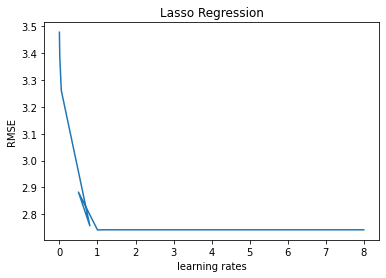

BEST VALUE FOR ALPHA IS:  1


In [61]:
x_train,y_train,x_test,y_test = read_dataset("C:\\Users\\Keshav Gambhir\\Desktop\\Assignment-1\\Datasets\\abalone.data")
learning_rates = [8,7,5,2,1.5,1.2, 1, 0.5,0.8,0.05,0.01,0.005,0.001,0.0001]
i = 0
predicted_values_list = []
while(i < len(learning_rates)):
  lassoRegression = Lasso(learning_rates[i])
  lassoRegression.fit(x_train,y_train)
  predicted_values_list.append(compute_rmse(y_test,lassoRegression.predict(x_test)))
  i+=1

plot_graph(learning_rates,predicted_values_list,"Lasso Regression")
print("BEST VALUE FOR ALPHA IS:  "+str(learning_rates[predicted_values_list.index(min(predicted_values_list))]))

Plot between Ridge Regressions RMSE and learning rates

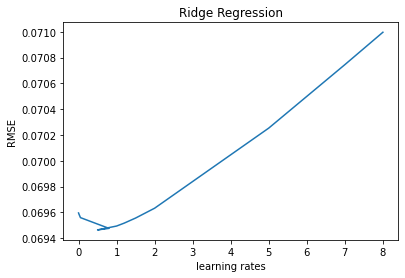

BEST VALUE FOR ALPHA IS:  0.5


In [51]:
x_train,y_train,x_test,y_test = read_dataset("C:\\Users\\Keshav Gambhir\\Desktop\\Assignment-1\\Datasets\\abalone.data")
learning_rates = [8,7,5,2,1.5,1.2, 1, 0.5,0.8,0.05,0.01,0.005,0.001,0.0001]
i = 0
predicted_values_list = []
while(i < len(learning_rates)):
  ridgeRegression = Ridge(alpha= learning_rates[i])
  ridgeRegression.fit(x_train,y_train)
  predicted_values_list.append(compute_rmse(y_test,ridgeRegression.predict(x_test)))
  i += 1

plot_graph(learning_rates,predicted_values_list,"Ridge Regression")
print("BEST VALUE FOR ALPHA IS:  "+str(learning_rates[predicted_values_list.index(min(predicted_values_list))]))

Use of GridSearch function from Sklearn to find the best value of alpha

In [52]:
x_train,y_train = read_dataset_with_random_splitting("C:\\Users\\Keshav Gambhir\\Desktop\\Assignment-1\\Datasets\\abalone.data")
learning_rates ={'alpha': [8,7,5,2,1.7,1.2, 1, 0.5,0.8,0.05,0.01,0.015,0.021,0.0001,0.0023]}
lassoRegression2 = Lasso()
regression = GridSearchCV(lassoRegression2,learning_rates,scoring="neg_root_mean_squared_error", cv = 6)
regression.fit(x_train,y_train)
best_alpha_val = regression.best_params_
print(best_alpha_val)

{'alpha': 0.0023}


Use of GridSearch function from Sklearn to find the best value of alpha for Ridge Regression

In [53]:
x_train,y_train = read_dataset_with_random_splitting("C:\\Users\\Keshav Gambhir\\Desktop\\Assignment-1\\Datasets\\abalone.data")
learning_rates ={'alpha': [8,7,5,2,1.7,1.2, 1, 0.5,0.8,0.05,0.01,0.015,0.021,0.0001,0.0023]}
ridgeRegression2 = Ridge()
regression = GridSearchCV(ridgeRegression2,learning_rates,scoring="neg_root_mean_squared_error", cv = 6)
regression.fit(x_train,y_train)
best_alpha_val = regression.best_params_
print(best_alpha_val)

{'alpha': 0.8}
